I)  Describe the Langevin stochastic process, show your python implementation, plot the autocorrelation function versus time, determine the integrated autocorrelation time (and show that it agrees with expectation;  see my Langevin.pdf note where I give a formula for the diffusion constant D which you can easily relate to tau_c)

II) Obtain the S&P500 data over the course of a day sampled *at the level of minutes*.  Plot the autocorrelation function (a plot like in fig. 7.3 in the book) and determine the integrated autocorrelation time.

In [28]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt

In [ ]:
print(np.random.normal())

In [2]:
B = 2.0
gamma = .8
N = 20000
T = 10
dt = T/N
particles = 10000
sd = math.sqrt(B**2/(2*gamma))
v0 = np.random.normal(0,sd,size=particles)
vt = copy.deepcopy(v0)

def v(i, vt):
    dv = B*math.sqrt(dt)*np.random.normal(0,1,size=particles) - gamma*vt*dt
    vt += dv
    return vt

D = np.linspace(0,T,N)
corr = np.linspace(0,T,N)
for i in range(N):
    vt = v(i, vt)
    D[i] = np.mean(vt*v0)*dt
    corr[i] = np.mean(vt*v0)/((B**2)/(2*gamma))


#for i in range(N):
    #vt = v(vt)
    #corr[i] = np.mean(vt*v0)/((B**2)/(2*gamma))

In [3]:
np.sum(D)

3.084037557947977

In [5]:
(B**2)/(2*(gamma**2))

3.1249999999999996

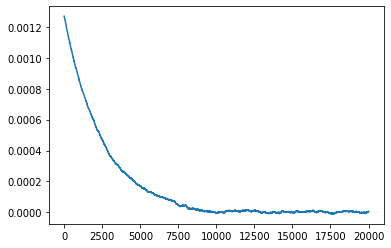

In [8]:
plt.plot(D)
plt.show()

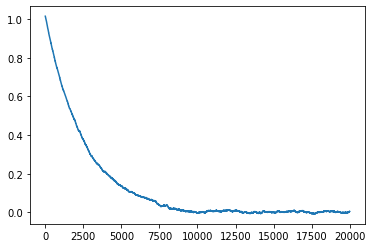

In [9]:
plt.plot(corr)
plt.show()

In [29]:
import pandas as pd

In [45]:
df = pd.read_excel("S&P_data1_minute.xlsx")

In [46]:
#showing a summary of what our data looks like
df.head()

,Date,Time,Open,High,Low,Close
0,2021-01-04,09:30:00,3764.61,3769.99,3764.61,3766.63
1,2021-01-04,09:31:00,3766.41,3767.22,3765.83,3766.13
2,2021-01-04,09:32:00,3765.93,3765.93,3763.09,3763.09
3,2021-01-04,09:33:00,3762.91,3762.91,3760.55,3760.99
4,2021-01-04,09:34:00,3761.13,3761.68,3759.62,3759.80


In [47]:
df.columns

Index(['Date', 'Time', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [48]:
#Choosing a date to work with
df = df[df["Date"] == "1/7/2021"]
df

,Date,Time,Open,High,Low,Close
1188,2021-01-07,09:30:00,3764.71,3775.35,3764.71,3774.91
1189,2021-01-07,09:31:00,3774.98,3777.14,3774.98,3776.77
1190,2021-01-07,09:32:00,3776.90,3780.02,3776.90,3779.47
1191,2021-01-07,09:33:00,3779.62,3782.72,3779.62,3780.82
1192,2021-01-07,09:34:00,3780.48,3781.43,3778.56,3778.56
...,...,...,...,...,...,...
1579,2021-01-07,16:01:00,3803.79,3803.79,3803.79,3803.79
1580,2021-01-07,16:02:00,3803.79,3803.79,3803.79,3803.79
1581,2021-01-07,16:03:00,3803.79,3803.79,3803.79,3803.79
1582,2021-01-07,16:04:00,3803.79,3803.79,3803.79,3803.79


In [49]:
#Averages for all the columns
df.mean()

Open     3801.089848
High     3801.677551
Low      3800.621894
Close    3801.182980
dtype: float64

In [50]:
close = df[["Time","Close"]]
open_price = df[["Time","Open"]]

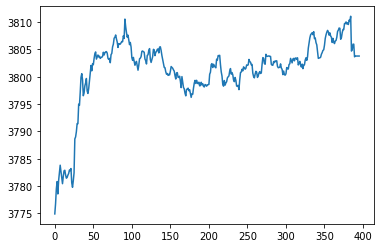

In [51]:
plt.plot(np.arange(0,396),df['Close'])
plt.plot(np.mean(df["Close"]))
plt.show()

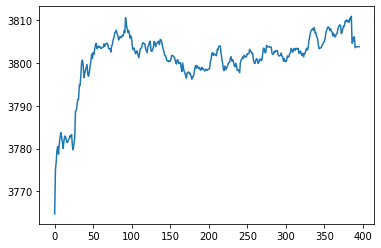

In [52]:
plt.plot(np.arange(0,396),df['Open'])
plt.plot(np.mean(df["Open"]))
plt.show()

In [37]:
def autocorr(tao,data,mean):
    top, bottom = 0,0
    for i in range(150-tao):
        top += (data[i] - mean)*(data[i+tao] - mean)
    for i in range(150):
        bottom += (data[i] - mean)**2
    return top/bottom

In [53]:
open_price = np.array(df["Open"])
open_price_mean = np.mean(open_price)

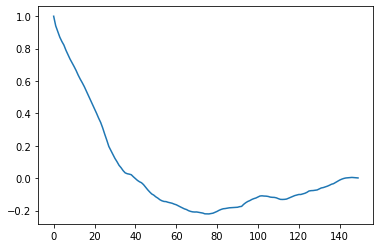

In [54]:
autocorr_open = []
for i in range(150):
    autocorr_open.append(autocorr(i,open_price,open_price_mean))
autocorr_open = np.array(autocorr_open)
plt.plot(autocorr_open)

In [55]:
close_price = np.array(df["Close"])
close_price_mean = np.mean(close_price)

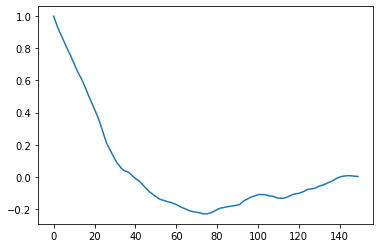

In [56]:
autocorr_close = []
for i in range(150):
    autocorr_close.append(autocorr(i,close_price,close_price_mean))
autocorr_open = np.array(autocorr_close)
plt.plot(autocorr_close)